In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy.spatial.distance import cdist
 
%matplotlib inline

In [9]:
data = pd.read_csv("/home/terrence/Projects/PycharmProjects/MachineLeaningTut/data/health_data.csv")
data.head() 

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.4 KB


In [10]:
data.columns = map(str.upper, data.columns)
data = data.dropna()
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 6502
Data columns (total 20 columns):
BIO_SEX      4601 non-null float64
AGE          4601 non-null float64
TREG1        4601 non-null float64
ALCEVR1      4601 non-null float64
ALCPROBS1    4601 non-null int64
MAREVER1     4601 non-null int64
COCEVER1     4601 non-null int64
INHEVER1     4601 non-null int64
CIGAVAIL     4601 non-null float64
DEP1         4601 non-null float64
ESTEEM1      4601 non-null float64
VIOL1        4601 non-null float64
PASSIST      4601 non-null int64
DEVIANT1     4601 non-null float64
SCHCONN1     4601 non-null float64
GPA1         4601 non-null float64
EXPEL1       4601 non-null float64
FAMCONCT     4601 non-null float64
PARACTV      4601 non-null float64
PARPRES      4601 non-null float64
dtypes: float64(15), int64(5)
memory usage: 754.9 KB


In [11]:
cluster = data[['ALCEVR1', 'ALCPROBS1', 'MAREVER1', 'DEP1', 'ESTEEM1', 'VIOL1', 'DEVIANT1', 'SCHCONN1', 'FAMCONCT', 'PARACTV', 'PARPRES']]
cluster_s = cluster.copy()

cluster_s['ALCEVR1'] = preprocessing.scale(cluster_s['ALCEVR1'].astype('float64'))
cluster_s['ALCPROBS1'] = preprocessing.scale(cluster_s['ALCPROBS1'].astype('float64'))
cluster_s['MAREVER1'] = preprocessing.scale(cluster_s['MAREVER1'].astype('float64'))
cluster_s['DEP1'] = preprocessing.scale(cluster_s['DEP1'].astype('float64'))
cluster_s['ESTEEM1'] = preprocessing.scale(cluster_s['ESTEEM1'].astype('float64'))
cluster_s['VIOL1'] = preprocessing.scale(cluster_s['VIOL1'].astype('float64'))
cluster_s['DEVIANT1'] = preprocessing.scale(cluster_s['DEVIANT1'].astype('float64'))
cluster_s['SCHCONN1'] = preprocessing.scale(cluster_s['SCHCONN1'].astype('float64'))
cluster_s['FAMCONCT'] = preprocessing.scale(cluster_s['FAMCONCT'].astype('float64'))
cluster_s['PARACTV'] = preprocessing.scale(cluster_s['PARACTV'].astype('float64'))
cluster_s['PARPRES'] = preprocessing.scale(cluster_s['PARPRES'].astype('float64'))


In [12]:
cluster_train, cluster_test = train_test_split(cluster_s, test_size=0.2, random_state=123)

clusters = range(1, 11)
mean_dist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(
        cluster_train, model.cluster_centers_, 'euclidean'), axis=1))/cluster_train.shape[0])

Text(0.5, 1.0, 'Elbow Method for our k values')

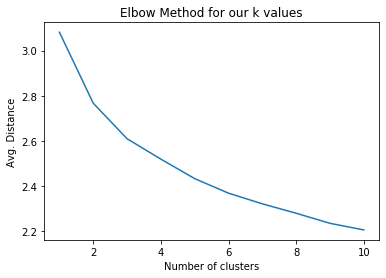

In [11]:
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Distance')
plt.title('Elbow Method for our k values')

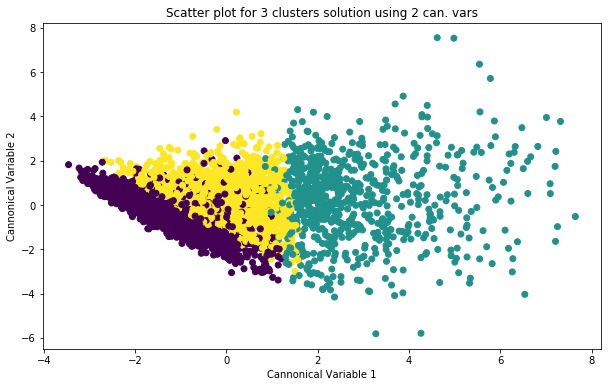

In [13]:

model1 = KMeans(n_clusters=3)
model1.fit(cluster_train)

pca_2 = PCA(2)
plt.figure(figsize=(10,6))
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=model1.labels_)
plt.xlabel('Cannonical Variable 1')
plt.ylabel('Cannonical Variable 2')
plt.title('Scatter plot for 3 clusters solution using 2 can. vars')
plt.show()

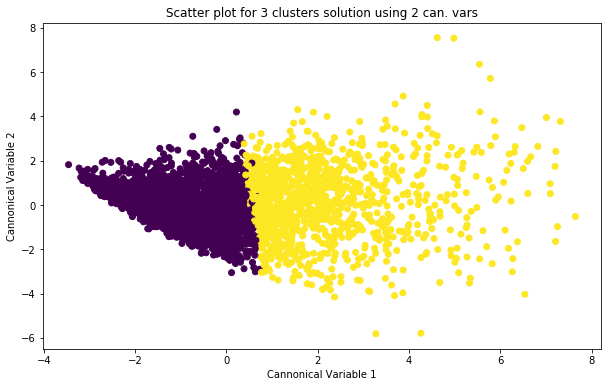

In [13]:
model2 = KMeans(n_clusters=2)
model2.fit(cluster_train)

pca_2 = PCA(2)
plt.figure(figsize=(10,6))
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=model2.labels_)
plt.xlabel('Cannonical Variable 1')
plt.ylabel('Cannonical Variable 2')
plt.title('Scatter plot for 3 clusters solution using 2 can. vars')
plt.show()
